### SALE PRICE FOR USED CARS

ABOUT

A data set containing information about used
cars such as color, price and so on, is used to train machine learning 
model to predict how some of the properties affect the pricing of the cars

STEPS

1. EXTRACTION 
   The data set used to train the machine learning model is in .data format. This is convert to
   .csv format throug Ms Excel.The converted file is imported to python using the pandas module
2. CLEANING
   The data is in a raw dirty form, this cannot be used directly to train a model hence a cleaning
   is necessary to avoid errors and biases. Tools needed for this step are
        - Pandas 
        - Numpy
    These tools are used to locate and remove datapoints which are null or NaN
3. EXPLORATORY
    The cleaned data set is explore to understand and identify potential errors or outlie, discover patterns,
    correlations and relationships between variables. Also to develop hypothesis and inform further investiagtion
    or modeling.
     Tools use for the exploratory step are:
         - Pandas
         - Numpy
         - Sklearn
         - Scipy
         - Annova
4.  VISUALIZATION
    A part of exploratory process that involves creating graphical representations of data to better understand and communicate.
       Visualiztion tools used are 
       - Bar Chart
       - Heat map 
       - Scatter Plot
       - Line Graph


In [1]:
"""importing the modules needed"""

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

Matplotlib is building the font cache; this may take a moment.


In [2]:
# import the data set

dataframe = pd.read_csv("carproject.csv")

In [4]:
#catch a glimpse of the dataset 

dataframe

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [5]:
#previewing the first 10 rows

dataframe.head(10)

 

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
6,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
8,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [6]:
# Since the original dataset contained no definide headers(the first row is automatically set as headers),
#we need to set the headers

# firts we create a list of 26 items, each representing the header of one column

myHeaders = ["symboling","normalised_losses","make","fuel_Type","aspiration",
            "num_of_doors","body_style","drive_wheels","engine_location","wheel_base",
            "length","width","height","curb_weight","engine_type","num_of_cylinders",
            "engine_size","fuel_system","bore","stroke","compression_ratio","horse_power",
             "peak_rpm","city_mpg","high_way","price"]



In [7]:
#setting the column headers
dataframe.columns = myHeaders

In [8]:
# displaying the first 10 rows of the dataset

dataframe.head(10)

,symboling,normalised_losses,make,fuel_Type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horse_power,peak_rpm,city_mpg,high_way,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
6,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
8,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [9]:
# Now eliminates datapoints that are null or NaN
df = dataframe
df.isna().any()

symboling            False
normalised_losses    False
make                 False
fuel_Type            False
aspiration           False
num_of_doors         False
body_style           False
drive_wheels         False
engine_location      False
wheel_base           False
length               False
width                False
height               False
curb_weight          False
engine_type          False
num_of_cylinders     False
engine_size          False
fuel_system          False
bore                 False
stroke               False
compression_ratio    False
horse_power          False
peak_rpm             False
city_mpg             False
high_way             False
price                False
dtype: bool

In [10]:
#finding if missing values
df.isnull().any() 

symboling            False
normalised_losses    False
make                 False
fuel_Type            False
aspiration           False
num_of_doors         False
body_style           False
drive_wheels         False
engine_location      False
wheel_base           False
length               False
width                False
height               False
curb_weight          False
engine_type          False
num_of_cylinders     False
engine_size          False
fuel_system          False
bore                 False
stroke               False
compression_ratio    False
horse_power          False
peak_rpm             False
city_mpg             False
high_way             False
price                False
dtype: bool

In [14]:
#checking total number of entries for each column

print("Data shape: ",dataframe.shape,end ="\n")
df.info()
print("Each column has the same number of non-null count")

Data shape:  (204, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalised_losses  204 non-null    object 
 2   make               204 non-null    object 
 3   fuel_Type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num_of_doors       204 non-null    object 
 6   body_style         204 non-null    object 
 7   drive_wheels       204 non-null    object 
 8   engine_location    204 non-null    object 
 9   wheel_base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb_weight        204 non-null    int64  
 14  engine_type        204 non-null    object 
 15  num_of_cylinders   204 non-null    object 
 16  eng

In [15]:
#checking the datatype of each column
dataframe.dtypes

symboling              int64
normalised_losses     object
make                  object
fuel_Type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horse_power           object
peak_rpm              object
city_mpg               int64
high_way               int64
price                 object
dtype: object

In [16]:
#price column should be of float or interger
dataframe.price.unique()

#it contains "?" which has to be eliminate

array(['16500', '13950', '17450', '15250', '17710', '18920', '23875', '?',
       '16430', '16925', '20970', '21105', '24565', '30760', '41315',
       '36880', '5151', '6295', '6575', '5572', '6377', '7957', '6229',
       '6692', '7609', '8558', '8921', '12964', '6479', '6855', '5399',
       '6529', '7129', '7295', '7895', '9095', '8845', '10295', '12945',
       '10345', '6785', '11048', '32250', '35550', '36000', '5195',
       '6095', '6795', '6695', '7395', '10945', '11845', '13645', '15645',
       '8495', '10595', '10245', '10795', '11245', '18280', '18344',
       '25552', '28248', '28176', '31600', '34184', '35056', '40960',
       '45400', '16503', '5389', '6189', '6669', '7689', '9959', '8499',
       '12629', '14869', '14489', '6989', '8189', '9279', '5499', '7099',
       '6649', '6849', '7349', '7299', '7799', '7499', '7999', '8249',
       '8949', '9549', '13499', '14399', '17199', '19699', '18399',
       '11900', '13200', '12440', '13860', '15580', '16900', '16695',


In [17]:
dataframe = dataframe[dataframe.price!= "?"]
dataframe.price.unique()

array(['16500', '13950', '17450', '15250', '17710', '18920', '23875',
       '16430', '16925', '20970', '21105', '24565', '30760', '41315',
       '36880', '5151', '6295', '6575', '5572', '6377', '7957', '6229',
       '6692', '7609', '8558', '8921', '12964', '6479', '6855', '5399',
       '6529', '7129', '7295', '7895', '9095', '8845', '10295', '12945',
       '10345', '6785', '11048', '32250', '35550', '36000', '5195',
       '6095', '6795', '6695', '7395', '10945', '11845', '13645', '15645',
       '8495', '10595', '10245', '10795', '11245', '18280', '18344',
       '25552', '28248', '28176', '31600', '34184', '35056', '40960',
       '45400', '16503', '5389', '6189', '6669', '7689', '9959', '8499',
       '12629', '14869', '14489', '6989', '8189', '9279', '5499', '7099',
       '6649', '6849', '7349', '7299', '7799', '7499', '7999', '8249',
       '8949', '9549', '13499', '14399', '17199', '19699', '18399',
       '11900', '13200', '12440', '13860', '15580', '16900', '16695',
     

In [18]:
#comparing the new dataframe to the former
dataframe
# there are 200 rows as compared with 204 in the original dataset. 
#four datapoints with "?" in the price column have been removed

,symboling,normalised_losses,make,fuel_Type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horse_power,peak_rpm,city_mpg,high_way,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [28]:
dataframe.dtypes

symboling              int64
normalised_losses     object
make                  object
fuel_Type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horse_power           object
peak_rpm              object
city_mpg               int64
high_way               int64
price                 object
dtype: object

In [19]:
#converting the price column to type interger
dataframe['price']=dataframe["price"].astype(int)

print(dataframe.dtypes)

symboling              int64
normalised_losses     object
make                  object
fuel_Type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horse_power           object
peak_rpm              object
city_mpg               int64
high_way               int64
price                  int32
dtype: object


<ipython-input-19-5a0f6b300d70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['price']=dataframe["price"].astype(int)


In [20]:
# convert mpg to L/100km 
dataframe["city_mpg"] = 235/dataframe["city_mpg"]
dataframe.rename(columns= {"city_mpg":"city_L/100km"},inplace = True)
dataframe.columns

<ipython-input-20-bd051903245a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["city_mpg"] = 235/dataframe["city_mpg"]
C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Index(['symboling', 'normalised_losses', 'make', 'fuel_Type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horse_power', 'peak_rpm', 'city_L/100km',
       'high_way', 'price'],
      dtype='object')

In [21]:
# we need to normalize values with simple scaling method

dataframe["length"] = dataframe["length"]/dataframe["length"].max()
dataframe["width"] = dataframe["width"]/dataframe["width"].max()
dataframe["height"] = dataframe["height"]/dataframe["height"].max()


<ipython-input-21-1389c532f559>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["length"] = dataframe["length"]/dataframe["length"].max()
<ipython-input-21-1389c532f559>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["width"] = dataframe["width"]/dataframe["width"].max()
<ipython-input-21-1389c532f559>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

<ipython-input-27-78f8a7e9cb0b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["price-binned"] = pd.cut(dataframe["price"],bins,


0         Low
1         Low
2         Low
3         Low
4         Low
        ...  
199       Low
200    Medium
201    Medium
202    Medium
203    Medium
Name: price-binned, Length: 200, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


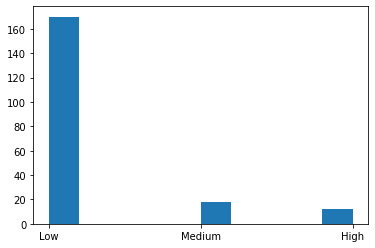

In [27]:
# binning- grouping values

bins = np.linspace(min(dataframe["price"]),max(dataframe["price"]),4)
groupNames = ["Low","Medium","High"]
dataframe["price-binned"] = pd.cut(dataframe["price"],bins,
                                  labels = groupNames,
                                  include_lowest = True)

print(dataframe['price-binned'])
plt.hist(dataframe['price-binned'])
plt.show();

In [32]:
# converting categorical to numerical variables

print(pd.get_dummies(dataframe["fuel_Type"]).head(),end ="\n")

# descriptive analysis
dataframe.describe()

   diesel  gas
0       0    1
1       0    1
2       0    1
3       0    1
4       0    1


,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_L/100km,high_way,price
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,98.848000,0.837232,0.915250,0.899523,2555.705000,126.860000,10.170100,9.937914,30.705000,13205.690000
std,1.248557,6.038261,0.059333,0.029207,0.040610,518.594552,41.650501,4.014163,2.539415,6.827227,7966.982558
min,-2.000000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,7.000000,4.795918,16.000000,5118.000000
25%,0.000000,94.500000,0.800937,0.891319,0.869565,2163.000000,97.750000,8.575000,7.833333,25.000000,7775.000000
50%,1.000000,97.000000,0.832292,0.909722,0.904682,2414.000000,119.500000,9.000000,9.791667,30.000000,10270.000000
75%,2.000000,102.400000,0.881788,0.926042,0.928512,2928.250000,142.000000,9.400000,12.368421,34.000000,16500.750000
max,3.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,23.000000,18.076923,54.000000,45400.000000


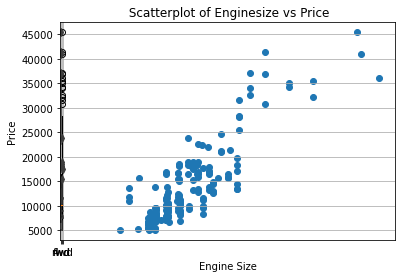

In [36]:
# plotting the data according to the price based on engine size

plt.boxplot(dataframe['price'])

sns.boxplot( x= "drive_wheels", y = "price", data = dataframe)

#predicting price based on engine size
plt.scatter(dataframe["engine_size"],dataframe["price"])
plt.title(" Scatterplot of Enginesize vs Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.grid()
plt.show();


In [39]:
#Group the data base on wheel, body-style and price

# group data
test_ = dataframe[["drive_wheels","body_style","price"]]
dataGroup = test_.groupby(["drive_wheels",'body_style'],as_index = False).mean()

dataGroup

,drive_wheels,body_style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,26563.250000
9,rwd,hardtop,24202.714286


price                                            \
body_style   convertible       hardtop     hatchback         sedan   
drive_wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd             11595.00   8249.000000   8396.387755   9811.800000   
rwd             26563.25  24202.714286  14337.777778  21711.833333   

                            
body_style           wagon  
drive_wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

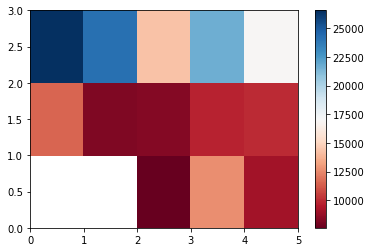

In [42]:
# Use pivot method and plotting the heatmap according to the data obtained by pivot method

data_Pivot = dataGroup.pivot(index = "drive_wheels",columns = "body_style")
display(data_Pivot)
# heat map for visualization

plt.pcolor(data_Pivot,cmap = "RdBu")
plt.colorbar()
plt.show();


In [44]:
# obtaining the final result and displaying in the form of graph.

data_annova = dataframe[['make','price']]

grouped_annova = data_annova.groupby(["make"])
annova_results_l = sp.stats.f_oneway(
                        grouped_annova.get_group("honda")["price"],
                        grouped_annova.get_group("subaru")["price"]
)

print(annova_results_l)

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)


(0.0, 53499.58038193661)

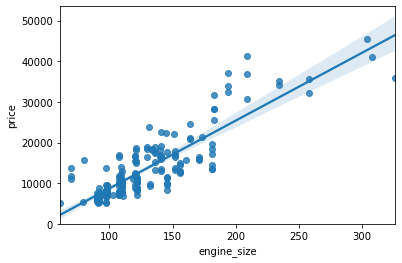

In [46]:
# As the slope of the graph is increasing in the positive direction, it is a positive linear relatioship
# strong corelation between a categorical variable if annova tests gives large f-test and small p-value

# corelation- measures dependency, not causation
sns.regplot(x="engine_size", y = "price", data = dataframe)
plt.ylim(0,)